# Exploratory Data Analysis - Retail Sales

## Objective
Perform comprehensive exploratory data analysis on the Customer Shopping Dataset to uncover:
- Sales patterns and trends
- Customer behavior insights
- Product performance
- Seasonal patterns

Dataset: https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset


In [1]:
# Import libraries
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent
sys.path.append(str(project_root / 'scripts'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from utils.db_operations import MongoDBHandler

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline
pd.set_option('display.max_columns', None)

print("✓ Libraries imported successfully")


✓ Libraries imported successfully


In [2]:
# Load data from MongoDB
db_handler = MongoDBHandler()
df = db_handler.read_to_dataframe('cleaned_sales')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
df.head()


2025-10-25 10:42:18 - mongodb_handler - INFO - Connected to MongoDB database: retail_sales_db
2025-10-25 10:42:19 - mongodb_handler - INFO - Read 99457 documents from cleaned_sales


Dataset shape: (99457, 16)

Columns: ['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall', 'total_amount', 'year', 'month', 'day', 'day_of_week', 'quarter']


invoice_no customer_id  gender   age  category  quantity    price  \
0    I138884     C241288  female  28.0  clothing       5.0  1500.40   
1    I317333     C111565    male  21.0     shoes       3.0  1800.51   
2    I127801     C266599    male  20.0  clothing       1.0   300.08   
3    I173702     C988172  female  66.0     shoes       5.0  3000.85   
4    I337046     C189076  female  53.0     books       4.0    60.60   

  payment_method invoice_date   shopping_mall  total_amount  year  month  day  \
0    credit card   2022-08-05          kanyon       7502.00  2022      8    5   
1     debit card   2021-12-12  forum istanbul       5401.53  2021     12   12   
2           cash   2021-11-09       metrocity        300.08  2021     11    9   
3    credit card   2021-05-16    metropol avm      15004.25  2021      5   16   
4           cash   2021-10-24          kanyon        242.40  2021     10   24   

   day_of_week  quarter  
0            4        3  
1            6        4  
2            1        4  
3            6        2  
4            6        4

In [3]:
# Basic statistics
print("Dataset Info:")
df.info()
print("\n" + "="*80)
print("Statistical Summary:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  float64       
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  float64       
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  total_amount    99457 non-null  float64       
 11  year            99457 non-null  int64         
 12  month           99457 non-null  int64         
 13  day             99457 non-null  int64         
 14  day_of_week     99457 non-null  int64   

age      quantity         price                invoice_date  \
count  99457.000000  99457.000000  99457.000000                       99457   
mean      43.427089      3.003429    683.367796  2022-02-04 02:46:59.783424   
min       18.000000      1.000000      5.230000         2021-01-01 00:00:00   
25%       30.000000      2.000000     45.450000         2021-07-19 00:00:00   
50%       43.000000      3.000000    203.300000         2022-02-05 00:00:00   
75%       56.000000      4.000000   1200.320000         2022-08-22 00:00:00   
max       69.000000      5.000000   4664.930000         2023-03-08 00:00:00   
std       14.990054      1.413025    914.071277                         NaN   

       total_amount          year         month           day   day_of_week  \
count  99457.000000  99457.000000  99457.000000  99457.000000  99457.000000   
mean    2499.346641   2021.629408      6.113898     15.569603      2.993022   
min        5.230000   2021.000000      1.000000      1.000000      0.000000   
25%      136.350000   2021.000000      3.000000      8.000000      1.000000   
50%      600.170000   2022.000000      6.000000     16.000000      3.000000   
75%     2700.720000   2022.000000      9.000000     23.000000      5.000000   
max    23324.650000   2023.000000     12.000000     31.000000      6.000000   
std     4064.200061      0.636136      3.569511      8.799894      2.001752   

            quarter  
count  99457.000000  
mean       2.382668  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        3.000000  
max        4.000000  
std        1.148331

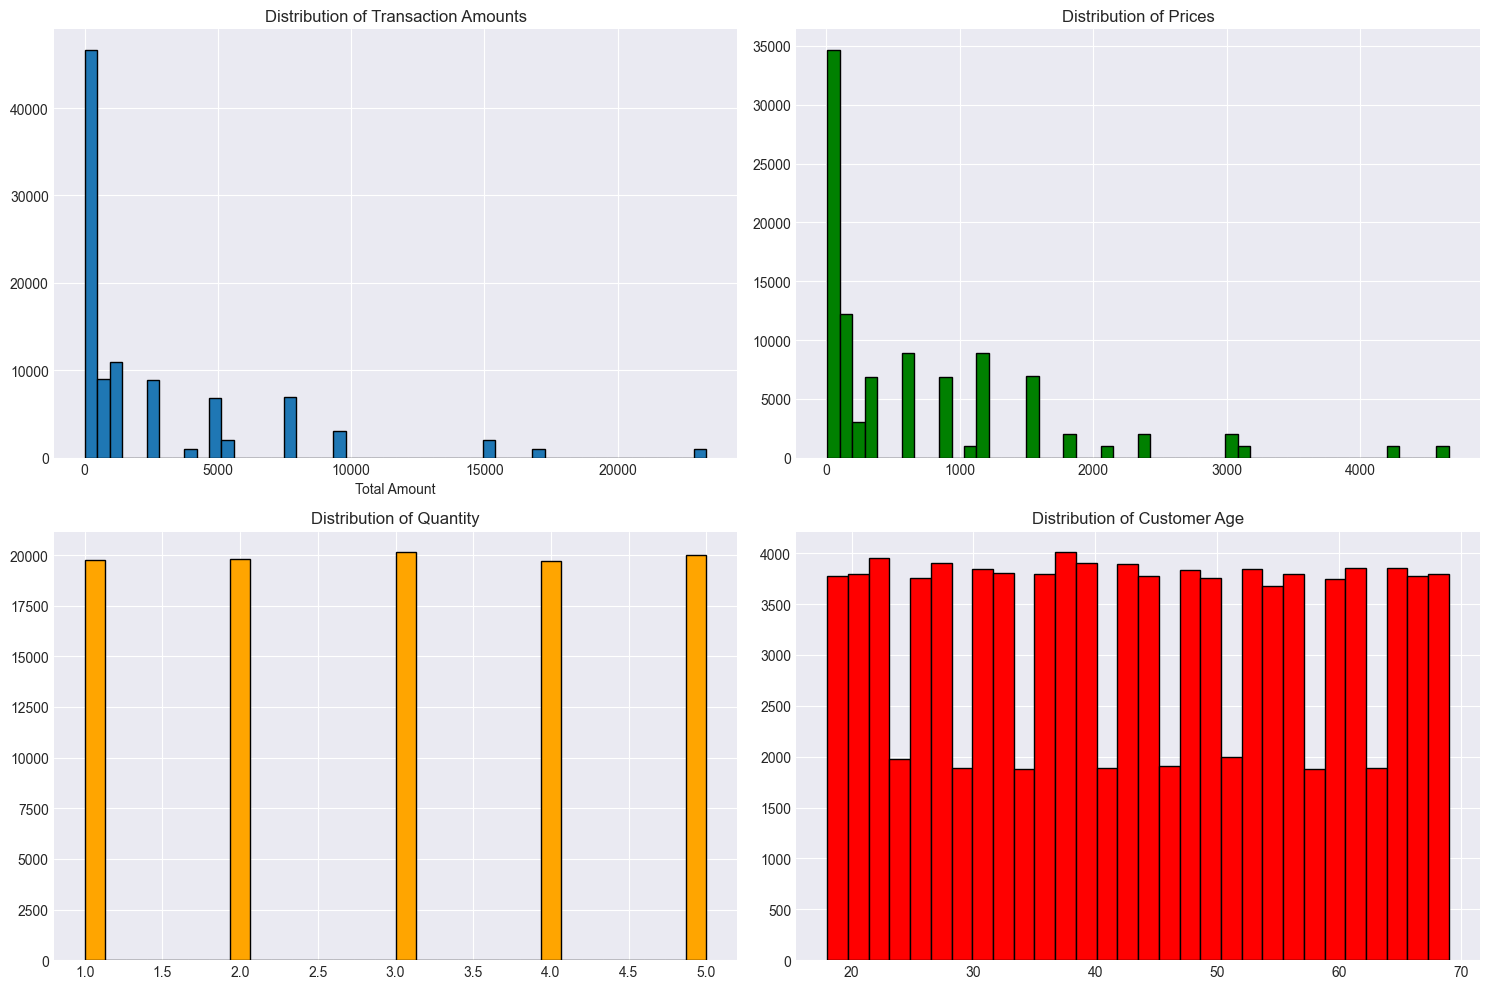

In [4]:
# Sales visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(df['total_amount'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of Transaction Amounts')
axes[0, 0].set_xlabel('Total Amount')

axes[0, 1].hist(df['price'], bins=50, edgecolor='black', color='green')
axes[0, 1].set_title('Distribution of Prices')

axes[1, 0].hist(df['quantity'], bins=30, edgecolor='black', color='orange')
axes[1, 0].set_title('Distribution of Quantity')

axes[1, 1].hist(df['age'], bins=30, edgecolor='black', color='red')
axes[1, 1].set_title('Distribution of Customer Age')

plt.tight_layout()
plt.show()


In [5]:
# Category analysis
category_sales = df.groupby('category')['total_amount'].agg(['sum', 'count']).sort_values('sum', ascending=False)

fig = px.bar(category_sales.reset_index(), x='category', y='sum', 
             title='Sales by Category', labels={'sum': 'Total Sales'})
fig.show()

fig = px.pie(category_sales.reset_index(), values='sum', names='category', 
             title='Sales Share by Category')
fig.show()


In [6]:
# Monthly sales analysis
monthly_sales = df.groupby(['year', 'month'])['total_amount'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))
monthly_sales = monthly_sales.sort_values('date')

# Create line plot
fig = px.line(monthly_sales, x='date', y='total_amount',
              title='Monthly Sales Trend',
              labels={'date': 'Month', 'total_amount': 'Total Sales'},
              markers=True)

# Customize layout
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Total Sales",
    showlegend=False
)

fig.show()

# Monthly sales statistics
print("\nMonthly Sales Statistics:")
print(monthly_sales.groupby('year')['total_amount'].describe())



Monthly Sales Statistics:
      count          mean           std         min           25%         50%  \
year                                                                            
2021   12.0  9.439451e+06  4.277834e+05  8658226.57  9.183824e+06  9423743.22   
2022   12.0  9.505402e+06  5.232035e+05  8262202.12  9.413662e+06  9589531.69   
2023    3.0  7.079759e+06  3.974205e+06  2490743.99  5.930958e+06  9371171.51   

               75%          max  
year                             
2021  9.562987e+06  10202881.73  
2022  9.856427e+06  10138733.22  
2023  9.374267e+06   9377361.88  


In [7]:
# Payment method analysis
payment_sales = df.groupby('payment_method')['total_amount'].agg(['sum', 'count']).sort_values('sum', ascending=False)

# Overall payment method distribution
fig = px.pie(payment_sales.reset_index(), values='sum', names='payment_method',
             title='Sales Distribution by Payment Method')
fig.show()

# Monthly trends by payment method
monthly_payment_sales = df.groupby(['year', 'month', 'payment_method'])['total_amount'].sum().reset_index()
monthly_payment_sales['date'] = pd.to_datetime(monthly_payment_sales[['year', 'month']].assign(day=1))
monthly_payment_sales = monthly_payment_sales.sort_values('date')

# Create line plot showing trends by payment method
fig = px.line(monthly_payment_sales, x='date', y='total_amount', color='payment_method',
              title='Monthly Sales Trend by Payment Method',
              labels={'date': 'Month', 'total_amount': 'Total Sales'})

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Total Sales",
    legend_title="Payment Method"
)

fig.show()

# Print summary statistics
print("\nPayment Method Statistics:")
print(payment_sales.sort_values('sum', ascending=False))



Payment Method Statistics:
                         sum  count
payment_method                     
cash            1.115100e+08  44447
credit card     8.705910e+07  34931
debit card      5.000843e+07  20079


In [8]:
# Weekday sales analysis
weekday_sales = df.groupby('day_of_week')['total_amount'].agg(['sum', 'mean', 'count']).round(2)
weekday_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.sort_values('sum', ascending=False)

# Create bar plot for total sales by day of week
fig = px.bar(weekday_sales.reset_index(), 
             x='index', 
             y='sum',
             title='Total Sales by Day of Week',
             labels={'index': 'Day of Week', 'sum': 'Total Sales'})

fig.update_layout(
    xaxis_title="Day of Week",
    yaxis_title="Total Sales",
    showlegend=False
)

fig.show()

# Create box plot to show sales distribution by day of week
fig = px.box(df, 
             x=df['day_of_week'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 
                                     3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}),
             y='total_amount',
             title='Sales Distribution by Day of Week')

fig.update_layout(
    xaxis_title="Day of Week",
    yaxis_title="Sales Amount",
    showlegend=False
)

fig.show()

# Print summary statistics
print("\nWeekday Sales Statistics:")
print(weekday_sales)

# Calculate and print best and worst days
best_day = weekday_sales.index[0]
worst_day = weekday_sales.index[-1]
print(f"\nBest performing day: {best_day} (Total sales: ${weekday_sales.loc[best_day, 'sum']:,.2f})")
print(f"Worst performing day: {worst_day} (Total sales: ${weekday_sales.loc[worst_day, 'sum']:,.2f})")

# Calculate average transaction value by day
print("\nAverage Transaction Value by Day:")
for day in weekday_sales.index:
    avg_transaction = weekday_sales.loc[day, 'mean']
    print(f"{day}: ${avg_transaction:,.2f}")



Weekday Sales Statistics:
                   sum     mean  count
Monday     36851994.91  2562.19  14383
Tuesday    35876846.26  2523.52  14217
Friday     35339259.84  2463.18  14347
Thursday   35313972.88  2499.40  14129
Sunday     35241512.06  2492.33  14140
Wednesday  35171951.83  2490.93  14120
Saturday   34781981.12  2463.14  14121

Best performing day: Monday (Total sales: $36,851,994.91)
Worst performing day: Saturday (Total sales: $34,781,981.12)

Average Transaction Value by Day:
Monday: $2,562.19
Tuesday: $2,523.52
Friday: $2,463.18
Thursday: $2,499.40
Sunday: $2,492.33
Wednesday: $2,490.93
Saturday: $2,463.14
